In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Download trained and monetary policy statements

In [28]:
df_articles=pd.read_csv('/Users/ruimaciel/Desktop/Local_ECB_Cacophony_Master_Thesis/df_final_with_bert_predictions.csv')

In [29]:
df_monetary_policy=pd.read_excel('/Users/ruimaciel/Desktop/Local_ECB_Cacophony_Master_Thesis/ecb_monetary_policy_decisions_classified.xlsx')

In [30]:
df_articles.columns

Index(['Unnamed: 0', 'Date', 'Source', 'Headline', 'Translated.headline',
       'Manual.summary', 'Original.article.url', 'Translated.text',
       'Media.type', 'Speaker', 'Reach', 'Language', 'Country.Code',
       'Sitename', 'Tags', 'Site_Readership', 'Article_Readership',
       'translated_text_preproc', 'manual_summary_preproc', 'Name_of_Speaker',
       'OpenAI_Score', 'bert_predictions_test', 'bert_predictions_everything'],
      dtype='object')

In [31]:
df_monetary_policy.columns

Index(['Date', 'Title', 'Link', 'Article', 'Classification Joaquin',
       'Classification Ed', 'Classification Rui'],
      dtype='object')

# Transforming Monetary policy Statements

In [32]:
# Ensure all text is in the same case and spaces are stripped
df_monetary_policy['Classification Joaquin'] = df_monetary_policy['Classification Joaquin'].str.lower().str.strip()
df_monetary_policy['Classification Ed'] = df_monetary_policy['Classification Ed'].str.lower().str.strip()
df_monetary_policy['Classification Rui'] = df_monetary_policy['Classification Rui'].str.lower().str.strip()

# Define the mapping
sentiment_mapping = {
    'dovish': -1,
    'neutral': 0,
    'hawkish': 1
}

# Apply the mapping to each column
df_monetary_policy['Classification Joaquin'] = df_monetary_policy['Classification Joaquin'].map(sentiment_mapping)
df_monetary_policy['Classification Ed'] = df_monetary_policy['Classification Ed'].map(sentiment_mapping)
df_monetary_policy['Classification Rui'] = df_monetary_policy['Classification Rui'].map(sentiment_mapping)

# Check the results
print(df_monetary_policy[['Classification Joaquin', 'Classification Ed', 'Classification Rui']].head())


   Classification Joaquin  Classification Ed  Classification Rui
0                       0                  0                   0
1                       1                  1                   0
2                       0                  1                   0
3                       1                  1                   0
4                       1                  1                   1


In [33]:
# Calculate the average of the three columns
df_monetary_policy['Average Classification'] = df_monetary_policy[['Classification Joaquin', 'Classification Ed', 'Classification Rui']].mean(axis=1)

# Check the results
print(df_monetary_policy[['Classification Joaquin', 'Classification Ed', 'Classification Rui', 'Average Classification']].head())


   Classification Joaquin  Classification Ed  Classification Rui  \
0                       0                  0                   0   
1                       1                  1                   0   
2                       0                  1                   0   
3                       1                  1                   0   
4                       1                  1                   1   

   Average Classification  
0                0.000000  
1                0.666667  
2                0.333333  
3                0.666667  
4                1.000000  


In [34]:
# Convert the 'Date' column to datetime format if not already
df_monetary_policy['Date'] = pd.to_datetime(df_monetary_policy['Date'])

# Now strip off the time
df_monetary_policy['Date'] = df_monetary_policy['Date'].dt.date

# Check the result
df_monetary_policy['Date'].head()


0    2024-03-07
1    2024-01-25
2    2023-12-14
3    2023-10-26
4    2023-09-14
Name: Date, dtype: object

In [35]:
# Create a new column "Name_of_Speaker" and fill it with "ECB_MONETARY_STATEMENT"
df_monetary_policy['Name_of_Speaker'] = 'ECB_MONETARY_STATEMENT'

# Drop the specified columns
df_monetary_policy = df_monetary_policy.drop(columns=['Title', 'Link', 'Classification Joaquin', 'Classification Ed', 'Classification Rui'])

# Rename columns
df_monetary_policy = df_monetary_policy.rename(columns={'Average Classification': 'Sentiment', 'Article': 'Statement'})

In [36]:
df_monetary_policy

,Date,Statement,Sentiment,Name_of_Speaker
0,2024-03-07,The Governing Council today decided to keep th...,0.000000,ECB_MONETARY_STATEMENT
1,2024-01-25,The Governing Council today decided to keep th...,0.666667,ECB_MONETARY_STATEMENT
2,2023-12-14,The Governing Council today decided to keep th...,0.333333,ECB_MONETARY_STATEMENT
3,2023-10-26,The Governing Council today decided to keep th...,0.666667,ECB_MONETARY_STATEMENT
4,2023-09-14,Inflation continues to decline but is still ex...,1.000000,ECB_MONETARY_STATEMENT
5,2023-07-27,Inflation continues to decline but is still ex...,1.000000,ECB_MONETARY_STATEMENT
6,2023-06-15,Inflation has been coming down but is projecte...,1.000000,ECB_MONETARY_STATEMENT
7,2023-05-04,The inflation outlook continues to be too high...,1.000000,ECB_MONETARY_STATEMENT
8,2023-03-16,Inflation is projected to remain too high for ...,1.000000,ECB_MONETARY_STATEMENT
9,2023-02-02,The Governing Council will stay the course in ...,1.000000,ECB_MONETARY_STATEMENT


# Analysis of the Open_AI and Bert_Model

In [37]:
# Keep only the specified columns
df_articles = df_articles[['Date', 'Manual.summary', 'Name_of_Speaker', 'OpenAI_Score', 'bert_predictions_everything']]

# Transform Date to keep only the date part
df_articles['Date'] = pd.to_datetime(df_articles['Date']).dt.date

# Rename columns
df_articles = df_articles.rename(columns={'Manual.summary': 'Statement'})

In [38]:
# Mapping dictionary
label_mapping = {'LABEL_2': 0, 'LABEL_1': 1, 'LABEL_0': -1}

# Replace the labels in the DataFrame
df_articles['bert_predictions_everything'] = df_articles['bert_predictions_everything'].replace(label_mapping)


In [39]:
df_articles

,Date,Statement,Name_of_Speaker,OpenAI_Score,bert_predictions_everything
0,2022-09-30,"At a conference in Florence, Banca d'Italia Go...",Mario Centeno,NaN,-1
1,2022-09-30,Banca d'Italia Governor Ignazio Visco on Fri...,Ignazio Visco,NaN,-1
2,2022-09-30,ECB Executive Board Member Isabel Schnabel ...,Isabel Schnabel,NaN,1
3,2022-09-30,In a speech organised by the Florence School o...,Ignazio Visco,NaN,1
4,2022-09-30,"According to first estimates, euro area inflat...",Christine Lagarde,NaN,1
...,...,...,...,...,...
30155,2024-01-02,Banco de España Governor Pablo Hernández de C...,Christine Lagarde,NaN,1
30156,2024-01-02,Both fixed and variable rate mortgages are exp...,Christine Lagarde,NaN,-1
30157,2024-01-02,Despite facing an extraordinary tax and increa...,Christine Lagarde,NaN,1
30158,2024-01-02,Banco de España Governor Pablo Hernández de C...,Pablo Hernandez de Cos,NaN,1


In [40]:
# Filter rows where OpenAI_Score is not NaN
filtered_df = df_articles.dropna(subset=['OpenAI_Score'])

filtered_df

,Date,Statement,Name_of_Speaker,OpenAI_Score,bert_predictions_everything
6,2022-09-30,"On Friday, ECB Executive Board Member Isabe...",Isabel Schnabel,1,1
35,2022-09-30,Inflation is the main concern of Banco de Espa...,Pablo Hernandez de Cos,1,1
47,2022-09-30,In view of the persistently high inflation in ...,Martins Kazaks,1,1
53,2022-09-30,Given the tight deadlines of a government that...,Fabio Panetta,1,1
92,2022-09-29,"""Fiscal policies should not fuel inflation,"" ...",Luis de Guindos,1,1
...,...,...,...,...,...
30086,2024-01-11,S&P Global Ratings predicts that the ECB wil...,Christine Lagarde,1,-1
30138,2024-01-05,The ECB will buy around EUR 135 billion in d...,Christine Lagarde,-1,-1
30140,2024-01-05,The ECB will buy around EUR 135 billion in d...,Christine Lagarde,-1,-1
30142,2024-01-04,As already predicted by ECB President Chris...,Christine Lagarde,-1,-1


In [41]:
# Extracting values from each row
for index, row in filtered_df.iterrows():
    print(f"Row {index}: OpenAI_Score = {row['OpenAI_Score']}, bert_predictions_everything = {row['bert_predictions_everything']}")

Row 6: OpenAI_Score = 1, bert_predictions_everything = 1
Row 35: OpenAI_Score = 1, bert_predictions_everything = 1
Row 47: OpenAI_Score = 1, bert_predictions_everything = 1
Row 53: OpenAI_Score = 1, bert_predictions_everything = 1
Row 92: OpenAI_Score = 1, bert_predictions_everything = 1
Row 93: OpenAI_Score = 1, bert_predictions_everything = 1
Row 94: OpenAI_Score = 1, bert_predictions_everything = 1
Row 98: OpenAI_Score = 1, bert_predictions_everything = 1
Row 124: OpenAI_Score = 1, bert_predictions_everything = 1
Row 130: OpenAI_Score = -1, bert_predictions_everything = -1
Row 147: OpenAI_Score = 1, bert_predictions_everything = 1
Row 199: OpenAI_Score = 1, bert_predictions_everything = 1
Row 202: OpenAI_Score = 1, bert_predictions_everything = 1
Row 213: OpenAI_Score = -1, bert_predictions_everything = -1
Row 219: OpenAI_Score = 1, bert_predictions_everything = 1
Row 220: OpenAI_Score = -1, bert_predictions_everything = 1
Row 245: OpenAI_Score = 1, bert_predictions_everything = 1
R

In [42]:
# Replace 'Error' with NaN and convert to float
filtered_df.replace('Error', np.nan, inplace=True)
filtered_df['OpenAI_Score'] = filtered_df['OpenAI_Score'].astype(float)
filtered_df['bert_predictions_everything'] = filtered_df['bert_predictions_everything'].astype(float)

# Compare columns and count matches
matches = (filtered_df['OpenAI_Score'] == filtered_df['bert_predictions_everything']).sum()

# Display the count of matches
print(f"Number of matches: {matches}")

Number of matches: 2778


/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_6609/599738244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.replace('Error', np.nan, inplace=True)
/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_6609/599738244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['OpenAI_Score'] = filtered_df['OpenAI_Score'].astype(float)
/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_6609/599738244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [43]:
# Group by 'OpenAI_Score' and count the occurrences of each 'bert_predictions_everything' value
bert_counts = filtered_df.groupby(['OpenAI_Score', 'bert_predictions_everything']).size().unstack(fill_value=0)

# Display the counts
print("Counts of bert_predictions_everything values for each OpenAI_Score:")
print(bert_counts)


Counts of bert_predictions_everything values for each OpenAI_Score:
bert_predictions_everything  -1.0   0.0   1.0
OpenAI_Score                                 
-1.0                          489     2    44
 0.0                           26   116   118
 1.0                           43    33  2173


In [44]:
confusion_matrix = pd.DataFrame(bert_counts, index=[-1.0, 0.0, 1.0])
confusion_matrix.columns = pd.MultiIndex.from_tuples([("bert_predictions_everything", col) for col in confusion_matrix.columns])

# Calculating precision and recall
precision = {}
recall = {}
f1_scores = {}

for label in confusion_matrix.index:
    tp = confusion_matrix.loc[label, ("bert_predictions_everything", label)]
    fp = confusion_matrix[("bert_predictions_everything", label)].sum() - tp
    fn = confusion_matrix.loc[label].sum() - tp
    precision[label] = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall[label] = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_scores[label] = 2 * (precision[label] * recall[label]) / (precision[label] + recall[label]) if (precision[label] + recall[label]) != 0 else 0

# Display the results
print("Precision per class:", precision)
print("Recall per class:", recall)
print("F1 Score per class:", f1_scores)


Precision per class: {-1.0: 0.8763440860215054, 0.0: 0.7682119205298014, 1.0: 0.9306209850107067}
Recall per class: {-1.0: 0.914018691588785, 0.0: 0.4461538461538462, 1.0: 0.9662072032014228}
F1 Score per class: {-1.0: 0.8947849954254345, 0.0: 0.5644768856447688, 1.0: 0.9480802792321116}


In [45]:
df_articles

,Date,Statement,Name_of_Speaker,OpenAI_Score,bert_predictions_everything
0,2022-09-30,"At a conference in Florence, Banca d'Italia Go...",Mario Centeno,NaN,-1
1,2022-09-30,Banca d'Italia Governor Ignazio Visco on Fri...,Ignazio Visco,NaN,-1
2,2022-09-30,ECB Executive Board Member Isabel Schnabel ...,Isabel Schnabel,NaN,1
3,2022-09-30,In a speech organised by the Florence School o...,Ignazio Visco,NaN,1
4,2022-09-30,"According to first estimates, euro area inflat...",Christine Lagarde,NaN,1
...,...,...,...,...,...
30155,2024-01-02,Banco de España Governor Pablo Hernández de C...,Christine Lagarde,NaN,1
30156,2024-01-02,Both fixed and variable rate mortgages are exp...,Christine Lagarde,NaN,-1
30157,2024-01-02,Despite facing an extraordinary tax and increa...,Christine Lagarde,NaN,1
30158,2024-01-02,Banco de España Governor Pablo Hernández de C...,Pablo Hernandez de Cos,NaN,1


# Cleaning Articles for creating the index

In [46]:
# Step 1: Count 'Error' in 'bert_predictions_everything'
error_count = df_articles['bert_predictions_everything'].value_counts().get('Error', 0)
print("Count of 'Error' in bert_predictions_everything:", error_count)

error_count = df_articles['OpenAI_Score'].value_counts().get('Error', 0)
print("Count of 'Error' in OpenAI_Score:", error_count)

# Step 2: Remove rows where 'bert_predictions_everything' is 'Error'
print(df_articles.shape[0])
df_articles = df_articles[df_articles['bert_predictions_everything'] != 'Error']
print(df_articles.shape[0])
df_articles = df_articles[df_articles['OpenAI_Score'] != 'Error']
print(df_articles.shape[0])

Count of 'Error' in bert_predictions_everything: 3
Count of 'Error' in OpenAI_Score: 3
30160
30157
30154


In [47]:
df_articles['OpenAI_Score'] = df_articles['OpenAI_Score'].astype(float)
df_articles['bert_predictions_everything'] = df_articles['bert_predictions_everything'].astype(float)

In [48]:
# Create 'Sentiment' column
df_articles['Sentiment'] = df_articles['OpenAI_Score'].combine_first(df_articles['bert_predictions_everything'])

# Calculate and print the unique counts and the amount of each in the 'Sentiment' column
unique_values_counts = df_articles['Sentiment'].value_counts()
print("Unique values and their counts in the 'Sentiment' column:")
print(unique_values_counts)

Unique values and their counts in the 'Sentiment' column:
Sentiment
 1.0    23634
-1.0     5200
 0.0     1320
Name: count, dtype: int64


In [49]:
df_articles.drop(columns=['OpenAI_Score', 'bert_predictions_everything'], inplace=True)

In [50]:
df_articles

,Date,Statement,Name_of_Speaker,Sentiment
0,2022-09-30,"At a conference in Florence, Banca d'Italia Go...",Mario Centeno,-1.0
1,2022-09-30,Banca d'Italia Governor Ignazio Visco on Fri...,Ignazio Visco,-1.0
2,2022-09-30,ECB Executive Board Member Isabel Schnabel ...,Isabel Schnabel,1.0
3,2022-09-30,In a speech organised by the Florence School o...,Ignazio Visco,1.0
4,2022-09-30,"According to first estimates, euro area inflat...",Christine Lagarde,1.0
...,...,...,...,...
30155,2024-01-02,Banco de España Governor Pablo Hernández de C...,Christine Lagarde,1.0
30156,2024-01-02,Both fixed and variable rate mortgages are exp...,Christine Lagarde,-1.0
30157,2024-01-02,Despite facing an extraordinary tax and increa...,Christine Lagarde,1.0
30158,2024-01-02,Banco de España Governor Pablo Hernández de C...,Pablo Hernandez de Cos,1.0


# Getting the information out

Name_of_Speaker
Christine Lagarde              18483
Luis de Guindos                 1752
Isabel Schnabel                 1137
Joachim Nagel                   1084
Philip Lane                     1080
Francois Villeroy de Galhau      951
Fabio Panetta                    838
Pablo Hernandez de Cos           633
Mario Centeno                    591
Ignazio Visco                    552
Yannis Stournaras                403
Klaas Knot                       352
Robert Holzmann                  344
Martins Kazaks                   340
Pierre Wunsch                    261
Piero Cipollone                  205
Gediminas Simkus                 200
Frank Elderson                   167
Gabriel Makhlouf                 162
Peter Kazimir                    153
Olli Rehn                        130
Constantinos Herodotou           108
Bostjan Vasle                     82
Boris Vujcic                      71
Madis Muller                      62
Edward Scicluna                   10
Gaston Reinesch       

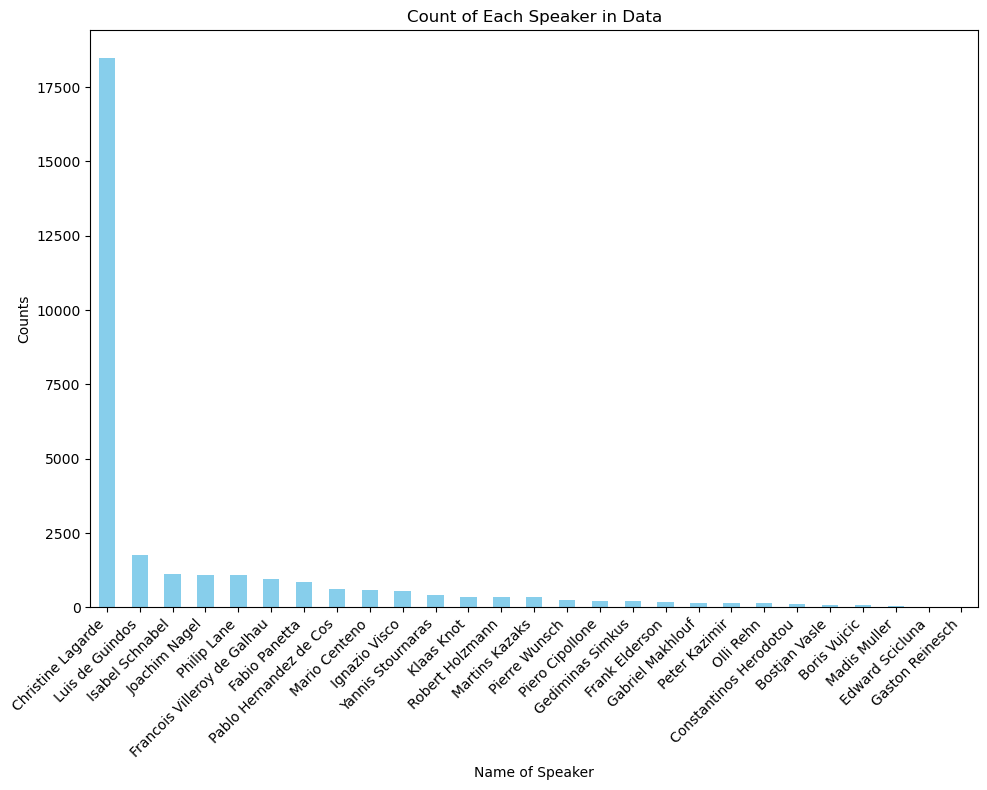

In [51]:
# Assuming df_scraped is already loaded with data

# Count occurrences of each unique value in 'Name_of_Speaker'
name_counts = df_articles['Name_of_Speaker'].value_counts()
print(name_counts)


# Plotting the counts
plt.figure(figsize=(10, 8))  # Set the figure size for better readability
name_counts.plot(kind='bar', color='skyblue')  # Create a bar plot
plt.title('Count of Each Speaker in Data')  # Title of the plot
plt.xlabel('Name of Speaker')  # Label for the x-axis
plt.ylabel('Counts')  # Label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust subplots to give some padding
plt.show()  # Display the plot

In [52]:
# Adding the Position column based on the given condition
executive_council_members = [
    'Christine Lagarde', 'Luis de Guindos', 'Joachim Nagel',
    'Isabel Schnabel', 'Philip Lane', 'Piero Cipollone'
]

df_articles['Position'] = np.where(df_articles['Name_of_Speaker'].isin(executive_council_members), 'Executive Council', 'Governor')


In [53]:
# Display the total count of unique values in the "Position" column
unique_position_counts = df_articles['Position'].value_counts()
print(unique_position_counts)

# Sum the occurrences of the executive council members in the "Name_of_Speaker" column
executive_council_count = df_articles['Name_of_Speaker'].isin(executive_council_members).sum()
print("Count of executive council members in 'Name_of_Speaker':", executive_council_count)


Position
Executive Council    23741
Governor              6413
Name: count, dtype: int64
Count of executive council members in 'Name_of_Speaker': 23741


# Merging with Monetary Policy Statements

In [54]:
df_articles.columns

Index(['Date', 'Statement', 'Name_of_Speaker', 'Sentiment', 'Position'], dtype='object')

In [55]:
df_monetary_policy.columns

Index(['Date', 'Statement', 'Sentiment', 'Name_of_Speaker'], dtype='object')

In [57]:
# Add the 'Position' column to df_monetary_policy with "Monetary Policy Statement" values
df_monetary_policy['Position'] = 'Monetary Policy Statement'
print(df_monetary_policy.shape)
print(df_articles.shape)

# Concatenate the DataFrames
df_combined = pd.concat([df_articles, df_monetary_policy], ignore_index=True)
print(df_combined.shape)

# Display the combined DataFrame
df_combined

(14, 5)
(30154, 5)
(30168, 5)


,Date,Statement,Name_of_Speaker,Sentiment,Position
0,2022-09-30,"At a conference in Florence, Banca d'Italia Go...",Mario Centeno,-1.0,Governor
1,2022-09-30,Banca d'Italia Governor Ignazio Visco on Fri...,Ignazio Visco,-1.0,Governor
2,2022-09-30,ECB Executive Board Member Isabel Schnabel ...,Isabel Schnabel,1.0,Executive Council
3,2022-09-30,In a speech organised by the Florence School o...,Ignazio Visco,1.0,Governor
4,2022-09-30,"According to first estimates, euro area inflat...",Christine Lagarde,1.0,Executive Council
...,...,...,...,...,...
30163,2023-02-02,The Governing Council will stay the course in ...,ECB_MONETARY_STATEMENT,1.0,Monetary Policy Statement
30164,2022-12-15,The Governing Council today decided to raise t...,ECB_MONETARY_STATEMENT,1.0,Monetary Policy Statement
30165,2022-10-27,The Governing Council today decided to raise t...,ECB_MONETARY_STATEMENT,1.0,Monetary Policy Statement
30166,2022-09-08,The Governing Council today decided to raise t...,ECB_MONETARY_STATEMENT,1.0,Monetary Policy Statement


# Trying things

In [62]:
# Group by 'Name_of_Speaker' and calculate the average sentiment
grouped_df = df_combined.groupby('Name_of_Speaker')['Sentiment'].mean().reset_index()

# Sort the resulting DataFrame by 'Sentiment'
grouped_df = grouped_df.sort_values(by='Sentiment')

# Print the resulting DataFrame in the desired format
for index, row in grouped_df.iterrows():
    print(f"{row['Name_of_Speaker']}, {row['Sentiment']}")


Yannis Stournaras, 0.25806451612903225
Ignazio Visco, 0.3442028985507246
Francois Villeroy de Galhau, 0.3648790746582545
Mario Centeno, 0.4213197969543147
Frank Elderson, 0.46107784431137727
Pablo Hernandez de Cos, 0.5055292259083728
Gediminas Simkus, 0.545
Isabel Schnabel, 0.5452946350043976
Fabio Panetta, 0.5501193317422435
Luis de Guindos, 0.5736301369863014
Madis Muller, 0.5967741935483871
Constantinos Herodotou, 0.6111111111111112
Klaas Knot, 0.6136363636363636
Christine Lagarde, 0.6328518097711411
Bostjan Vasle, 0.6585365853658537
Philip Lane, 0.6768518518518518
Pierre Wunsch, 0.6781609195402298
Peter Kazimir, 0.6797385620915033
Martins Kazaks, 0.7764705882352941
Robert Holzmann, 0.7819767441860465
Gabriel Makhlouf, 0.7839506172839507
Piero Cipollone, 0.8
Edward Scicluna, 0.8
Joachim Nagel, 0.801660516605166
Boris Vujcic, 0.8028169014084507
ECB_MONETARY_STATEMENT, 0.8333333333333333
Olli Rehn, 0.8384615384615385
Gaston Reinesch, 1.0


In [67]:
# Count the number of -1, 0, and 1 sentiments for each speaker
sentiment_counts = df_combined.groupby('Name_of_Speaker')['Sentiment'].apply(lambda x: x.value_counts().reindex([-1, 0, 1], fill_value=0)).unstack()

# Calculate the percentages
sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

# Add total number of rows per speaker
sentiment_counts['Total'] = sentiment_counts.sum(axis=1)

# Sort by the 1 sentiment percentage
sentiment_percentages_sorted = sentiment_percentages.sort_values(by=1, ascending=False)

# Merge the percentages with the total counts
sentiment_percentages_sorted['Total'] = sentiment_counts['Total']

# Print the sentiment percentages with total counts
print("\nSentiment percentages for each speaker sorted by 1 percentage:")
print(sentiment_percentages_sorted)


Sentiment percentages for each speaker sorted by 1 percentage:
Boris Vujcic                        -1          0           1  Total
Name_of_Speaker                                                     
Gaston Reinesch               0.000000   0.000000  100.000000      3
ECB_MONETARY_STATEMENT        0.000000   9.090909   90.909091     11
Boris Vujcic                  9.859155   0.000000   90.140845     71
Edward Scicluna              10.000000   0.000000   90.000000     10
Joachim Nagel                 9.132841   1.568266   89.298893   1084
Olli Rehn                     4.615385   6.923077   88.461538    130
Martins Kazaks               10.000000   2.352941   87.647059    340
Robert Holzmann               9.302326   3.197674   87.500000    344
Gabriel Makhlouf              7.407407   6.790123   85.802469    162
Piero Cipollone               4.390244  11.219512   84.390244    205
Philip Lane                  15.648148   1.018519   83.333333   1080
Bostjan Vasle                17.073171 

In [60]:
# Group by 'Name_of_Speaker' and calculate the average sentiment
grouped_df = df_combined.groupby('Position')['Sentiment'].mean().reset_index()

# Sort the resulting DataFrame by 'Sentiment'
grouped_df = grouped_df.sort_values(by='Sentiment')

# Print the resulting DataFrame in the desired format
for index, row in grouped_df.iterrows():
    print(f"{row['Position']}, {row['Sentiment']}")

Governor, 0.5220645563698737
Executive Council, 0.6354407986184238
Monetary Policy Statement, 0.8333333333333333


# Cluster

for each,number of dovish message per month, number of hawkish per month, drivers of this difference. 

also add a lag. if i had a lot hawkish messages last do i have more this month.

to observe the persistence of the hawkish

In [ ]:
# Cluster
target variable

hawkish, 

dovish

difference between the two

absolute value the difference.